## Sim Demo

### Imports

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from env.imports import *

In [6]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [7]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 3.2%
RAM Usage: 2.7%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [8]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [9]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [10]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Spinning gene expression
Spin index for seed 9: 8
Mean error rank for spin index 8: 243.66666666666663
Number of components for 95% variance PCA: 27
Spinning gene expression
Spin index for seed 9: 8
Mean error rank for spin index 8: 243.66666666666663
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: {'Vis': 61, 'SomMot': 77, 'DorsAttn': 46, 'SalVentAttn': 47, 'Limbic': 26, 'Cont': 52, 'Default': 91, 'Subcortical': 46, 'Cerebellum': 9}
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: cfohk5gu
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/cfohk5gu
Initialized sweep with ID: cfohk5gu


  warnings.warn(



Testing network: Vis
SomMot
DorsAttn
SalVentAttn
Limbic
Cont
Default
Subcortical
Cerebellum
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'activation': 'none', 'learning_rate': 0.0001, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True, 'reduced_dim': 10, 'epochs': 125}
Number of learnable parameters in Bilinear low rank model: 73800
  Linear layer 1: 73800 parameters
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB
Best val loss so far at epoch 1: 0.1752
Best val loss so far at epoch 2: 0.1577
Best val loss so far at epoch 3: 0.1526
Epoch 5/125, Train Loss: 0.0269, Val Loss: 0.1595, Time: 2.52s
Best val loss so far at epoch 8: 0.1501
Epoch 10/125, Train Loss: 0.0266, Val Loss: 0.1526, Time: 2.89s
Best val loss so far at epoch 12: 0.1465
Epoch 15/125, Train Loss: 0.0262, Val Loss: 0.1479, Time: 2.44s
Best val loss so far at epoch 17: 0.1181
Epoch 20/125, Train Loss: 0.0251, Val Loss: 0.1674, Time: 2.78s
Best val loss 

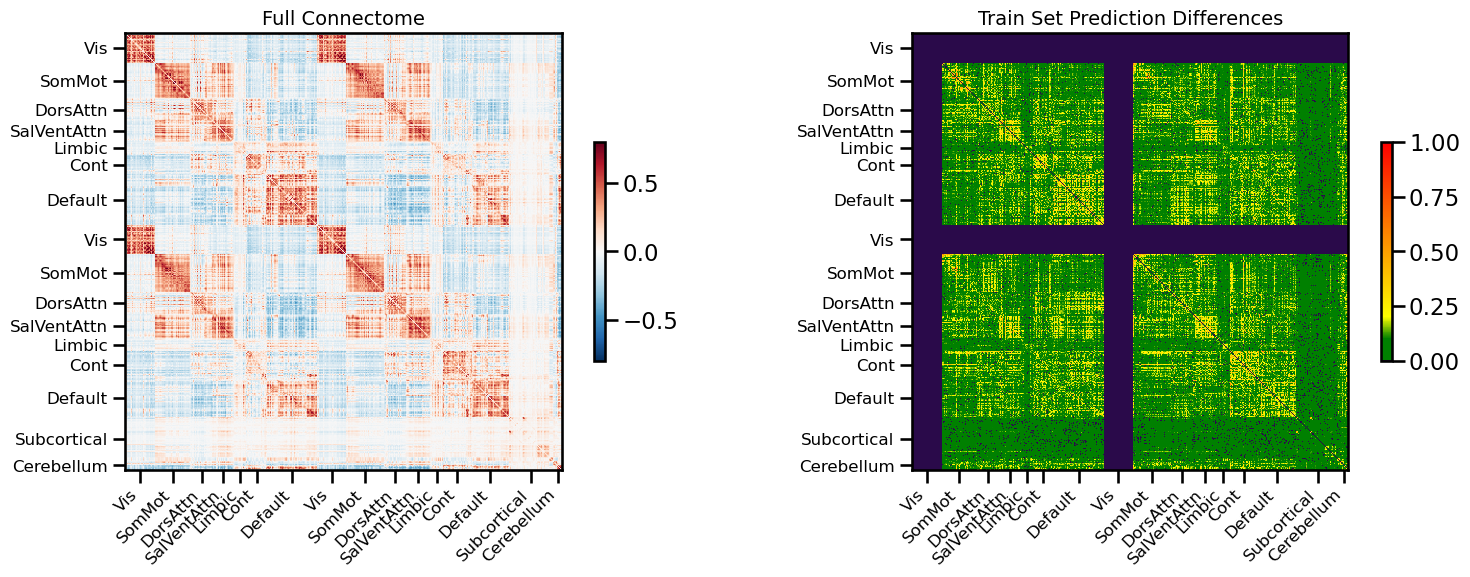

<Figure size 640x480 with 0 Axes>

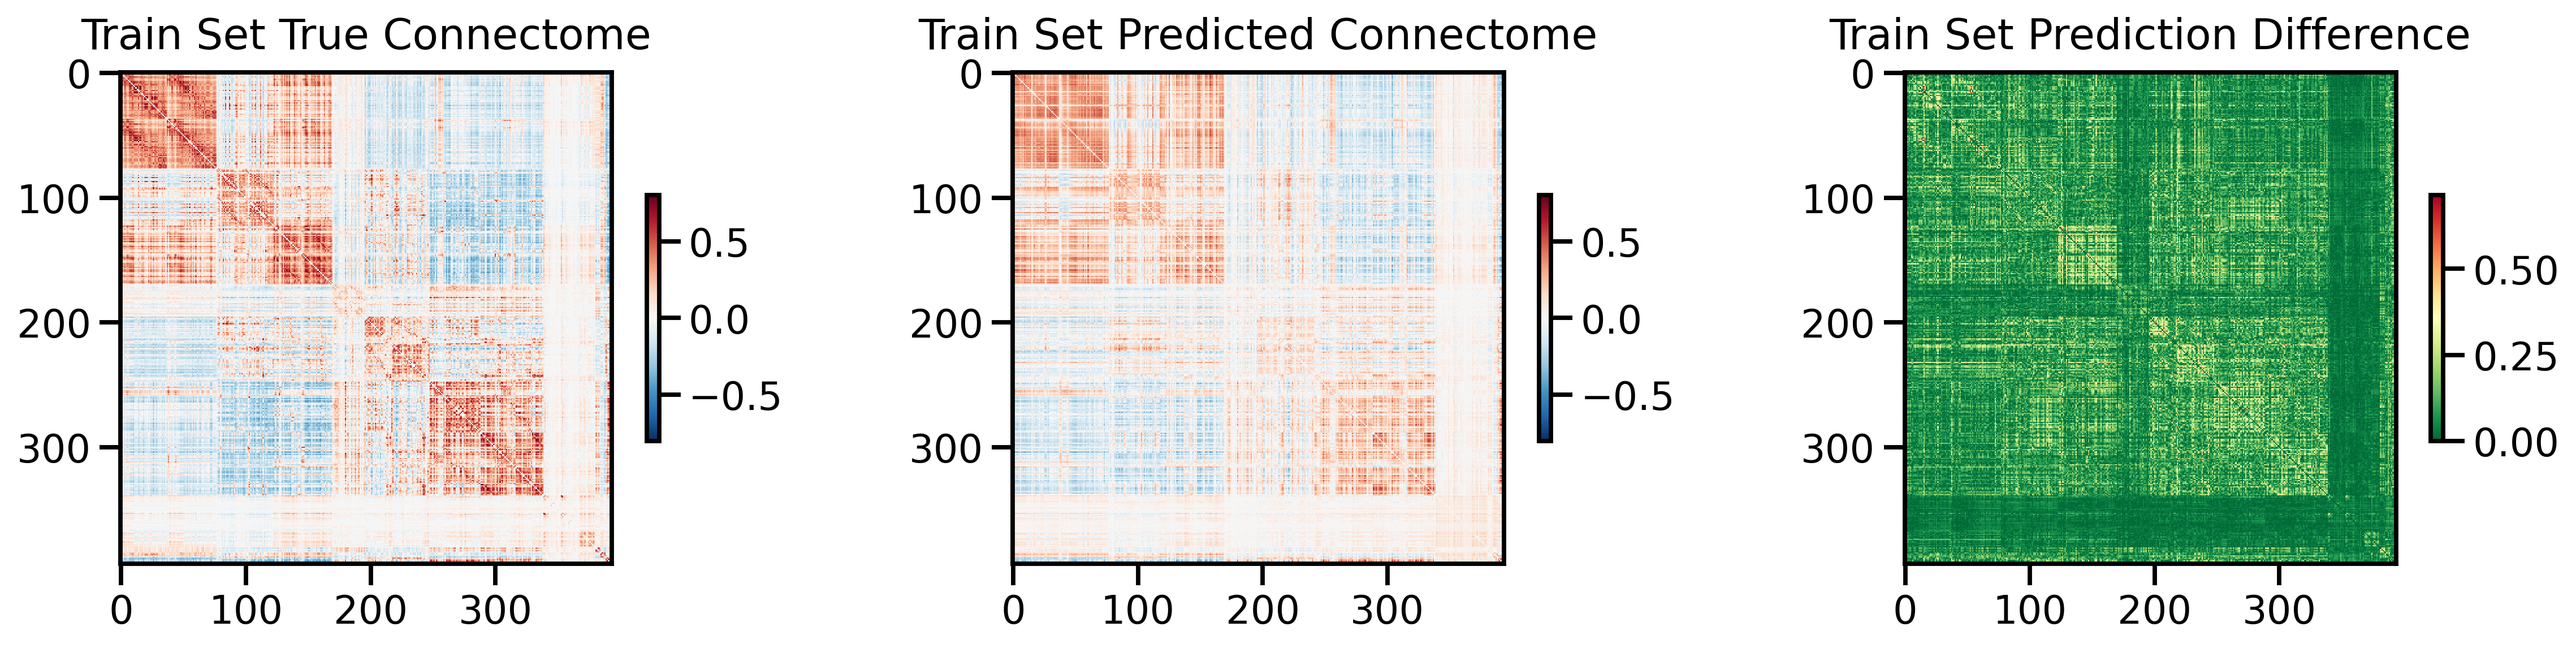

<Figure size 640x480 with 0 Axes>

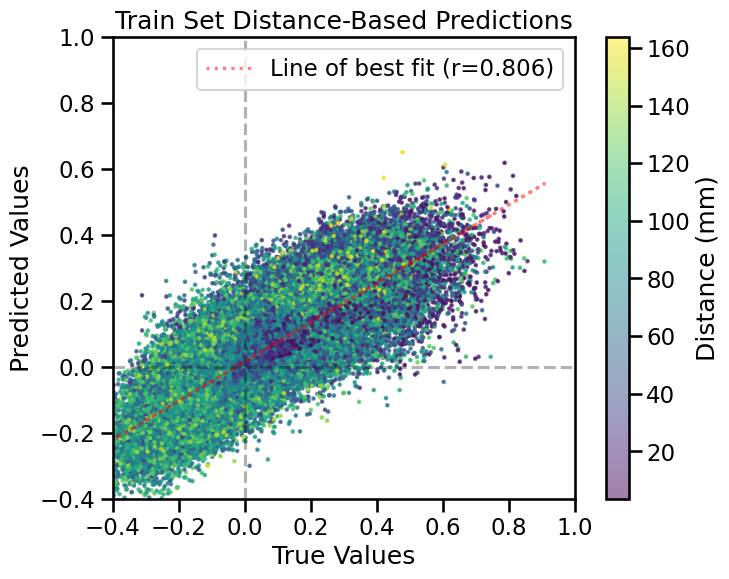

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 61 regions, 51728 connections


<Figure size 640x480 with 0 Axes>

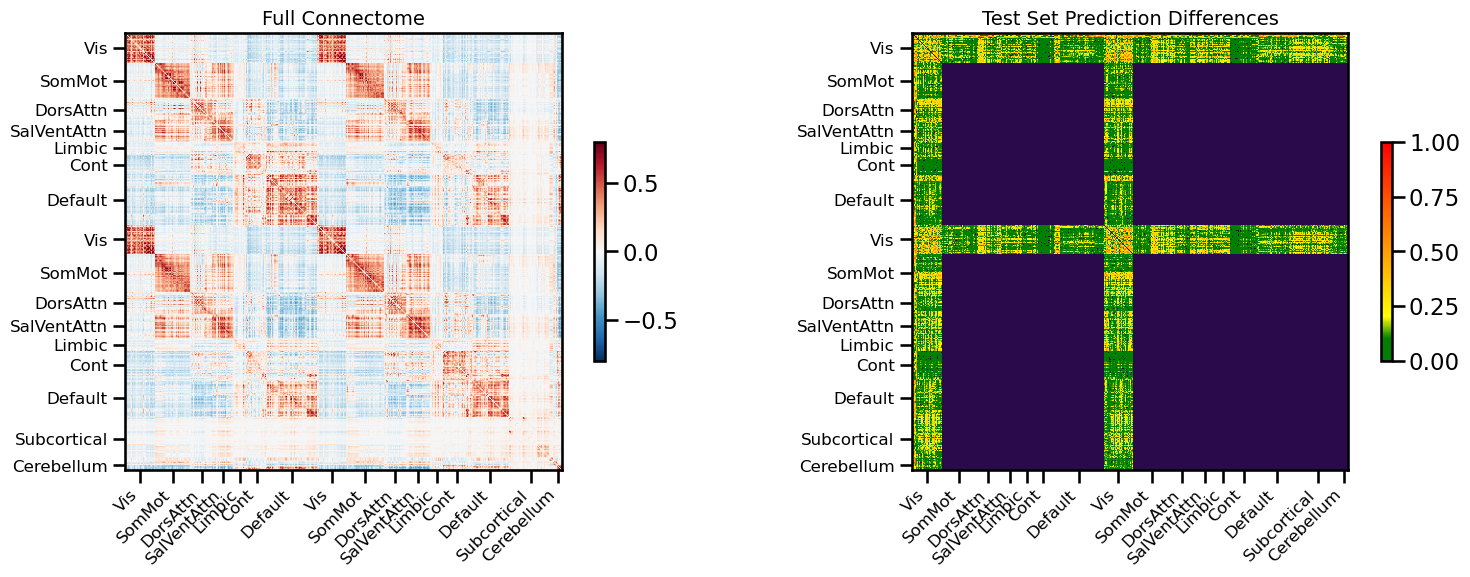

<Figure size 640x480 with 0 Axes>

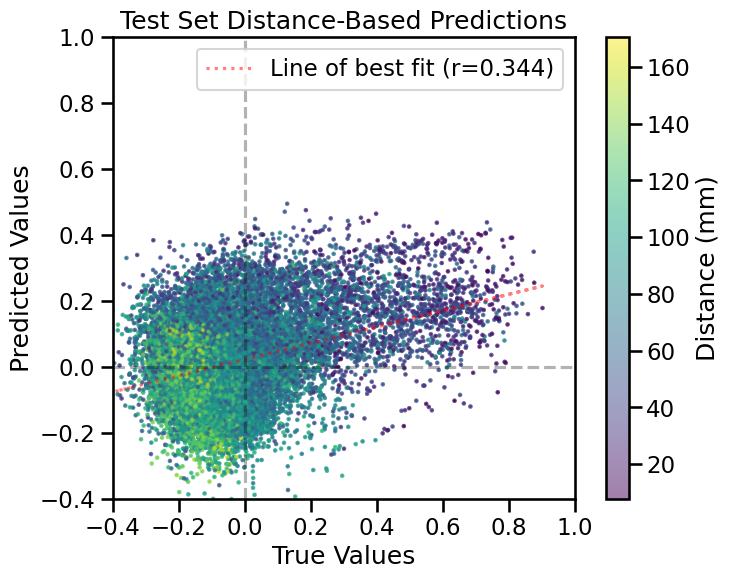

TRAIN METRICS
GLOBAL: mse=0.012371, mae=0.081337, r2=0.6440, pearson_r=0.8056, spearman_r=0.7869, geodesic_distance=22.7366
DISTANCE-BASED: short=0.8010, mid=0.7961, long=0.8020
HEMISPHERIC: left=0.8197, right=0.7996, inter=0.8078
CONNECTION STRENGTH: neg=0.3257, weak=0.7235, pos=0.3180
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.8369    0.8360
  Default       0.8014    0.8208
  SalVentAttn    0.8453    0.8234
  Limbic        0.6905    0.7753
  DorsAttn      0.7208    0.8350
  SomMot        0.8600    0.8503
  Subcortical    0.7862    0.8226
  Cerebellum    0.6912    0.8180

TEST METRICS
GLOBAL: mse=0.030243, mae=0.131053, r2=-0.0990, pearson_r=0.3439, spearman_r=0.2268
DISTANCE-BASED: short=0.3879, mid=0.1898, long=-0.0388
HEMISPHERIC: left=0.1688, right=0.2543, inter=0.2238
CONNECTION STRENGTH: neg=0.0384, weak=0.1932, pos=0.1272
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont   

0

<Figure size 640x480 with 0 Axes>

In [12]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=True,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='schaefer',
              random_seed=9,
              search_method=('wandb', 'mse', 2),
              track_wandb=False,
              skip_cv=True,
              model_type='bilinear_lowrank',
              use_gpu=True, 
              null_model='spin',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()